<a href="https://colab.research.google.com/github/donajac/Computer_Vision_Projects/blob/main/face_recognition_system_using_eigen_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eighen Face Recognition System


**DONA JACOB B170280EC**

**Abstract**

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition.All dimensions of an image are  not equally useful.Here we use PCA method  to obtain Principal components and Euclidean distance to achieve face Recognition

In [ ]:
#for mounting drive for adding data
# Total of 165 images are present
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. INTRODUCTION
This document is a report on  using dimensionality reduction and linear algebra concepts to recognize faces. This approach is computationally less expensive and easy to implement and uses Principal component analysis for dimensionality reduction .

2. THEORY
                   A.EIGEN FACES

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition.This approach was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces .
The motivation of Eigenfaces is twofold:

Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
Represent face images efficiently.

To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

                    B.EIGENVALUES

Eigenvalues are a special set of scalars associated with a linear system of equations (i.e., a matrix equation) that are sometimes also known as characteristic roots.In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue, often denoted by, is the factor by which the eigenvector is scaled.

                   C. EIGEN VECTORS
If the new transformed vector is just a scaled form of the original vector then the original vector is known to be an eigenvector of the original matrix. Vectors that have this characteristic are special vectors and they are known as eigenvectors.Eigenvectors can be used to represent a dimensional matrx

                    D. PCA

 Principal component analysis (PCA) was invented in 1901 by Karl Pearson. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
PCA is the simplest of the true eigenvector-based multivariate analyses. Often, its operation can be thought of as revealing the internal structure of the data in a way that best explains the variance in the data. If a multivariate dataset is visualised as a set of coordinates in a high-dimensional data space (1 axis per variable), PCA can supply the user with a lower-dimensional picture, a projection of this object when viewed from its most informative viewpoint. This is done by using only the first few principal components so that the dimensionality of the transformed data is reduced.
                   3. DATASET
 The Yale Face Database (size 6.4MB) contains 165 grayscale images in GIF format of 15 individuals. There are 11 images per subject, one per different facial expression or configuration: center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, and wink.
         
                    4. ALGORITHM
Reading an image
Use matplotlib.image to read the data in the form of array,RGB values. And resize the images.
The dimension of the entire dataset would (165,50,50)


Assemble data matrix
Consider a set of m images of dimension N*N (training images).

convert these images into vectors of size N2

C.  Compute the mean face
The mean vector consists of the means of each variable and the variance-covariance matrix consists of the variances of the variables along the main diagonal and the covariances between each pair of variables in the other matrix positions.
 Mean:   


D .Calculate PCA :
Subtract the mean. The average image a has to be subtracted from each original image in X
Calculate the eigenvectors and eigenvalues of the covariance matrix S.

Choose the principal components.
E. Eigenfaces with the highest eigenvalues are calculated using the training set. They are called the ghost faces.
 Here the images are very detailed and the background, the facial expressions, and the lighting conditions are quite varying. Thus the sharpness is sacrificed.

F .Reconstruct the image

            5  . FACE RECOGNITION

Here we use the algorithm for face detection in an unknown image In the recognition process, an eigenface is formed for the given face image, and the Euclidean distances between this eigenface and the previously stored eigenfaces are calculated. The eigenface with the smallest Euclidean distance is the one the person resembles the most.
The Eigenfaces method then performs face recognition by:
1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor between the projected training images and the projected query image.

The Euclidean distance between points p and q is the length of the line segment connecting theM


            6.OBSERVATIONS
            

The Eigenfaces method was applied on small training set of images.
The most significant eigenfaces, which have the largest eigenvalues and represent the largest variations in the face image database, were found and shown.
Reconstruction of an image was done by representing it as a linear combination of the eigenfaces.
failure probability is relatively high
because of the small number of training images. The future work will focus on increasing success rate for larger databases and combining with other face recognition algorithms.




In [ ]:
# To import libraries
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as matimg
import glob
%matplotlib inline

In [ ]:
# To get images from yalefaces folder

image_p = glob.glob("/content/drive/My Drive/yalefaces/yalefaces/subject*")
#print(image_paths)
lsq = []
i=0
for pat in image_p:
   image = matimg.imread(r'{}'.format(pat))
   resized_image = cv2.resize(image,(100,100)) #image resized to 100x100
   lsq.append(resized_image)
images = np.array(lsq)
backup=images.copy()
train ,test = train_test_split(images,test_size=0.1)
print(len(train))
print(len(test))
images=[]
images=train
row=images.shape[1]
col=images.shape[2]
N= images.shape[0]
print(images.shape)





149
17
(149, 100, 100)


In [ ]:
# Now changing the dimension of vector into N rows and 100*100 columns

img_vec = np.reshape(images,(N,row*col))
print(img_vec.shape)

(149, 10000)


In [ ]:
#Now we compute the mean image and the eighen vectors
#standardize data
mean_image_vector = np.mean(img_vec,axis=0)
std_image_vector = np.std(img_vec,axis=0)
normls = []
for imgv in img_vec:
    normls.append((imgv-mean_image_vector)/std_image_vector)
normls = np.array(normls)

 #covariance matrix
ncovar = np.cov(np.transpose(normls))

#print("Computing eigenvectors")
 # Eigen vectors and values
eig_vals, eig_vects = np.linalg.eig(ncovar)
#print("Eigenvectors calculated")

 #mean image
mean_img = np.reshape(mean_image_vector,(images.shape[1],images.shape[2]))

eig_v=np.real(np.transpose(eig_vects))

In [ ]:
#Shape of the eighen vector
print(eig_v.shape)

(10000, 10000)


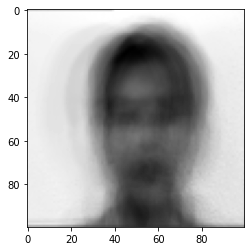

In [ ]:
# Plotting the mean image
plt.imshow(mean_img,cmap='gray')
plt.show()

In [ ]:
# Now computing coefficients  of a random image
siz=eig_v.shape[0]
cof=[]
for i in range(1000):
 cof.append(np.dot(eig_v[i],img_vec[10]))
print(cof)

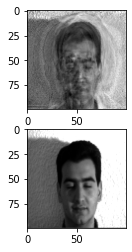

In [ ]:
#Now computing co efficiants of a random image and reconstucting it

img = np.zeros(len(img_vec[0])) # dummy
for i in range(len(cof)):
 img = img + cof[i]*eig_v[i]
fmg=(np.reshape(img,(100,100)))
plt.subplot(2,1,1)
plt.imshow(fmg,cmap='gray')
plt.subplot(2,1,2)
tp=cv2.resize( img_vec[10],(100,100))
plt.imshow(images[10],cmap='gray')
plt.show()

In [ ]:
#Now we compute co efficiants of all the training data set
allco=[]
for i in range(149):
  cof=[]
  for j in range(500):
      cof.append(np.dot(eig_v[j],img_vec[i]))
 # print(cof)
  allco.append(cof)


In [ ]:
#Now we do the testing part
test_vec = np.reshape(test,(len(test),row*col))
print(test_vec.shape)


(17, 10000)


In [ ]:
# Now computing co efficiants of test images
t_allco=[]
for i in range(17):
  cof=[]
  for j in range(500):
      cof.append(np.dot(eig_v[j],test_vec[i]))
 # print(cof)
  t_allco.append(cof)

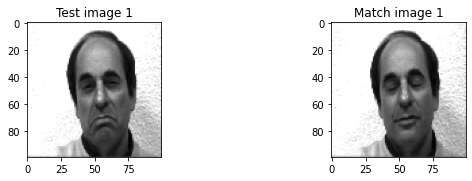

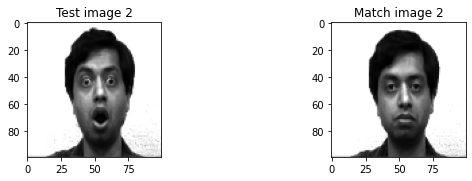

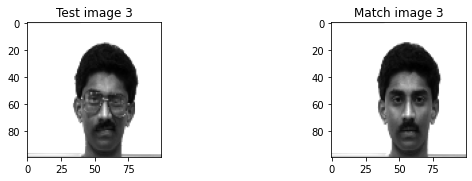

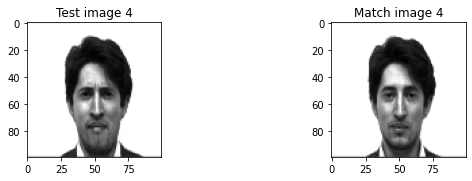

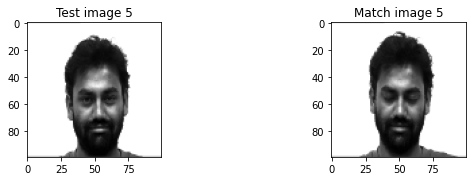

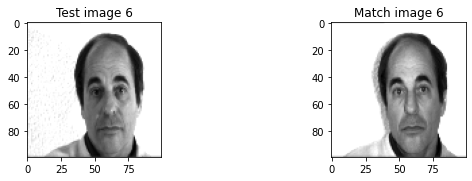

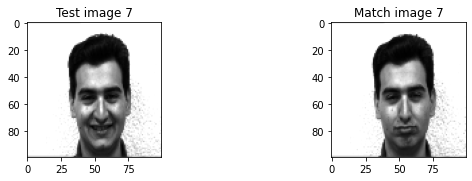

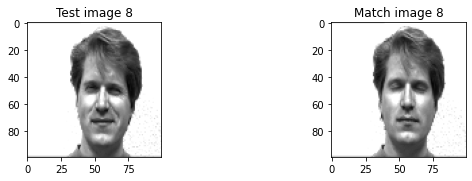

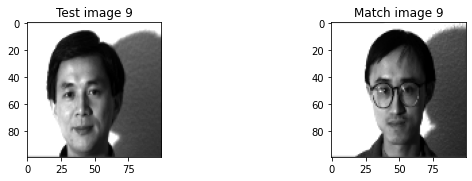

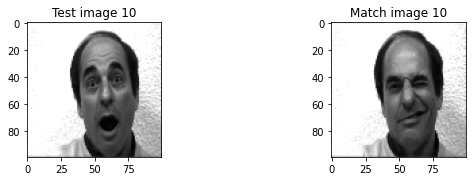

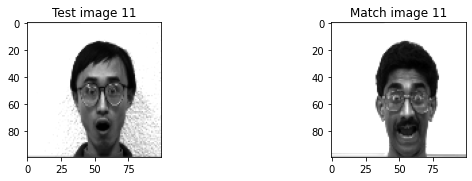

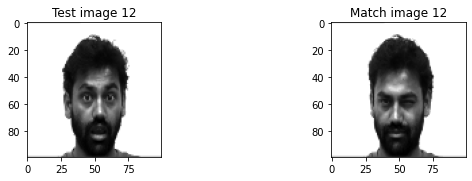

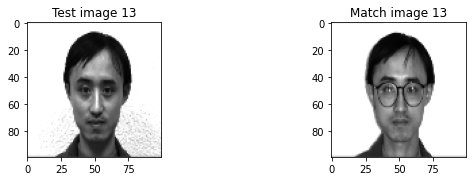

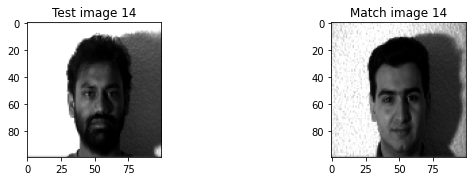

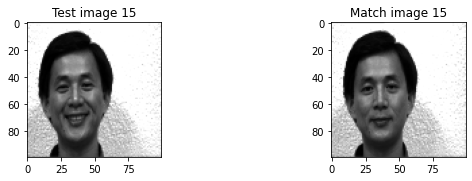

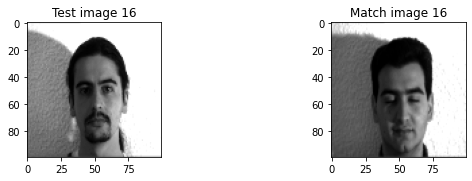

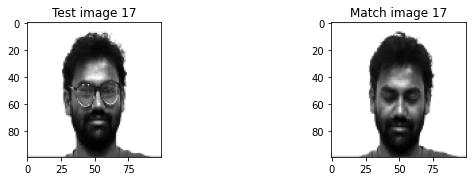

In [ ]:
# Now for recognizing the face and plotting it
from scipy.spatial import distance

num=1
mm=1
for i in range(17):
  lp=[]
  for d in range(149):
    dt=distance.euclidean(allco[d],t_allco[i])
    lp.append(dt)
  val=lp.index(min(lp))
  plt.figure(figsize=(10,50))
  plt.subplot(17,2,num)

  plt.title("Test image {}".format(mm))
  plt.imshow(test[i],cmap='gray')
  num=num+1
  plt.subplot(17,2,num)
  plt.title("Match image {}".format(mm))
  plt.imshow(images[val],cmap='gray')
  num=num+1
  mm=mm+1
 # print(num)
  #plt.show()



Out of 17 images, 13 images were identified correctly and 4 were misidentified.